## Dataset

The dataset can be found on kaggle website.
The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors.

In [2]:
#importing basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
#loading the dataset
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#EDA using pandas profiling

file = ProfileReport(df)
file.to_file('output.html')

D:\ANACONDA\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## Exploratory Data Analysis

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As can be seen, there are no null values in the dataset

In [6]:
#relationship analysis
correlation = df.corr()

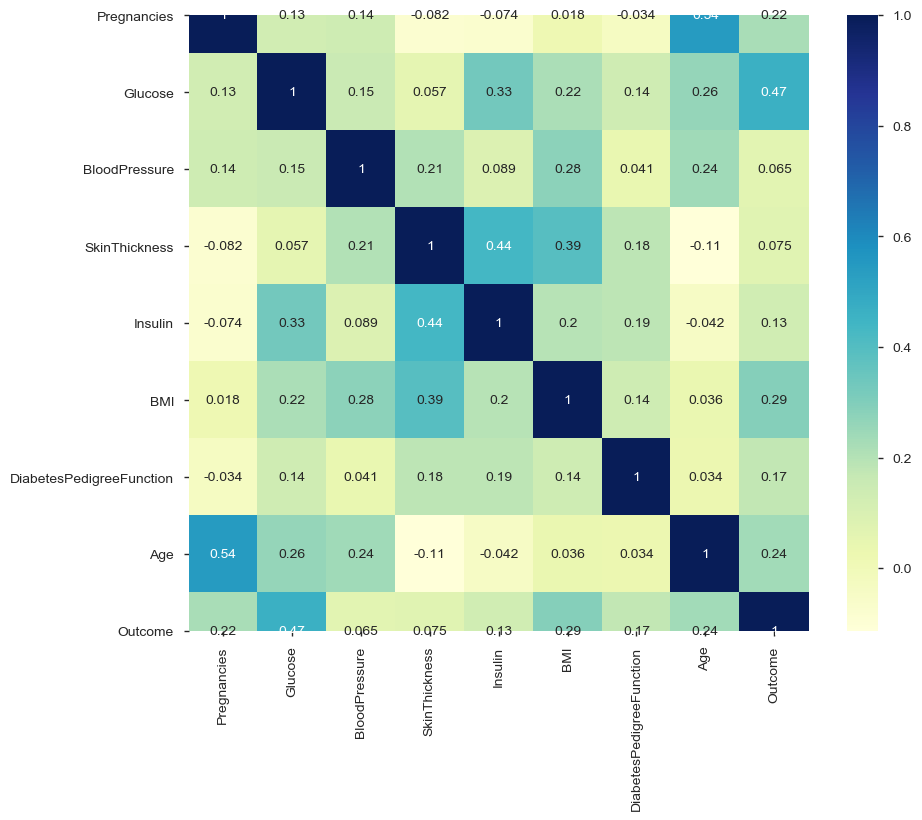

In [7]:
sns.heatmap(correlation, annot=True, cmap='YlGnBu')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

We can see that the correlation between blood pressure and output variable is very low, that is, blood pressure have little affect on whether or not a person has diabetes

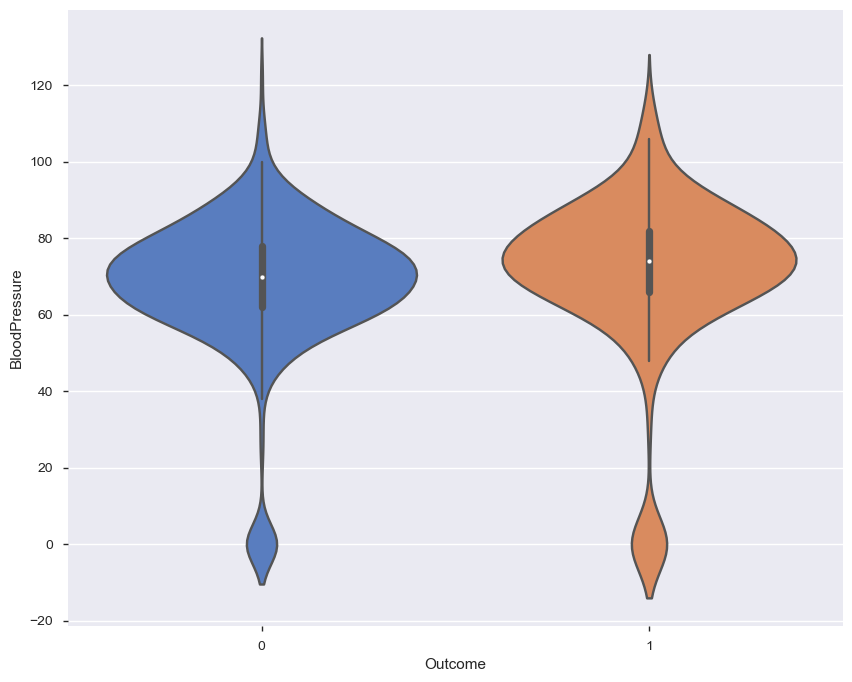

In [8]:
# classifying the blood pressure based on class

ax = sns.violinplot(x='Outcome',y='BloodPressure',data=df,palette="muted",split=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

We can see that the box plot for 1 (Diabetic) inside the violin is a little more away from the horizontal axis than the bos plot for 0 (Non Diabetic). It can be implied that diabetics seem to have higher blood pressure
Some of the values in the blood pressure column are zeros which is not correct, so we replace the zeros with median by classifying the blood pressure based on outcome

In [9]:
#Replacing the zero-values for Blood Pressure

df1 = df.loc[df['Outcome']==1]
df2 = df.loc[df['Outcome']==0]

df1 = df1.replace({'BloodPressure':0},np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':1},np.median(df2['BloodPressure']))

data = [df1,df2]
df = pd.concat(data)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,74,0,0,30.0,0.484,32,1


Also the body mass index (BMI) have zero values, which will be replaced by median values..

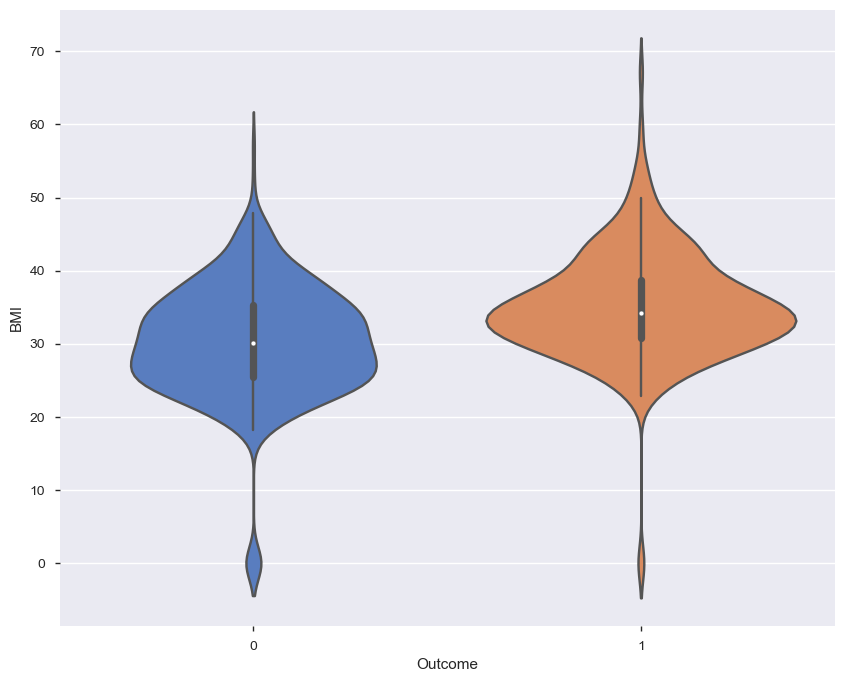

In [10]:
# classifying the blood pressure based on class

ax = sns.violinplot(x='Outcome',y='BMI',data=df,palette="muted",split=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

BMI for diabetics is higher than those for non diabetics

In [11]:
df1 = df.loc[df['Outcome']==1]
df2 = df.loc[df['Outcome']==0]

df1 = df1.replace({'BMI':0},np.median(df1['BMI']))
df2 = df2.replace({'BMI':1},np.median(df2['BMI']))

data = [df1,df2]
df = pd.concat(data)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.627,50,1
2,8,183,64,0,0,23.30,0.672,32,1
4,0,137,40,35,168,43.10,2.288,33,1
6,3,78,50,32,88,31.00,0.248,26,1
8,2,197,70,45,543,30.50,0.158,53,1
9,8,125,96,0,0,34.25,0.232,54,1
11,10,168,74,0,0,38.00,0.537,34,1
13,1,189,60,23,846,30.10,0.398,59,1
14,5,166,72,19,175,25.80,0.587,51,1
15,7,100,74,0,0,30.00,0.484,32,1


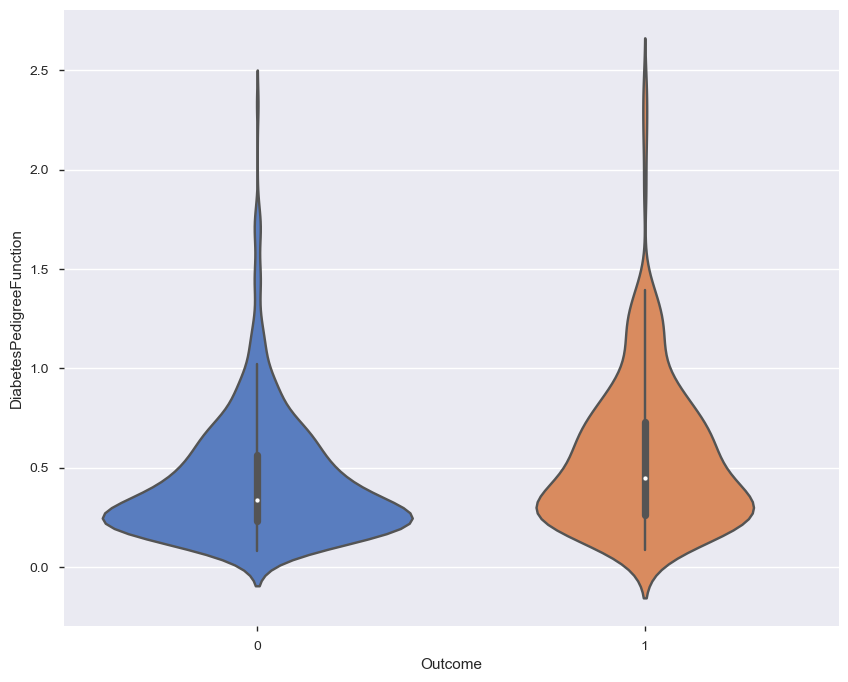

In [12]:
# classifying the BMI based on class

ax = sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,palette="muted",split=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Diabetics seem to have higher pedigree function than the non diabetics.

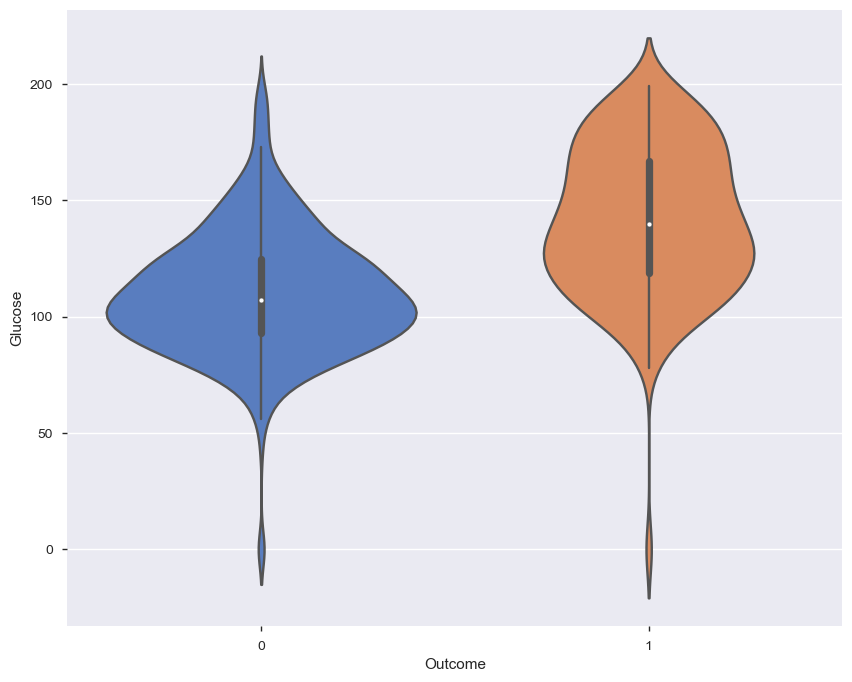

In [13]:
# classifying the glucose based on class

ax = sns.violinplot(x='Outcome',y='Glucose',data=df,palette="muted",split=True)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [14]:
df1 = df.loc[df['Outcome']==1]
df2 = df.loc[df['Outcome']==0]

df1 = df1.replace({'Glucose':0},np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':1},np.median(df2['Glucose']))

data = [df1,df2]
df = pd.concat(data)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.627,50,1
2,8,183,64,0,0,23.30,0.672,32,1
4,0,137,40,35,168,43.10,2.288,33,1
6,3,78,50,32,88,31.00,0.248,26,1
8,2,197,70,45,543,30.50,0.158,53,1
9,8,125,96,0,0,34.25,0.232,54,1
11,10,168,74,0,0,38.00,0.537,34,1
13,1,189,60,23,846,30.10,0.398,59,1
14,5,166,72,19,175,25.80,0.587,51,1
15,7,100,74,0,0,30.00,0.484,32,1


## Treating Outliers and Non-Linearity

Outliers are extreme values existing in the dataset. It is necessary to treat outliers if a distance based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect tree based algorithm. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution.

In [15]:
# Splitting the data into dependent and independent variables
Y = df.Outcome
x = df.drop('Outcome',axis=1)
columns = x.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(x)

data_x = pd.DataFrame(X, columns=columns)

## Splitting the dataset into Training and Test data

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_x,Y,test_size=0.20, random_state=33)

In [17]:
ytrain.value_counts()

0    396
1    218
Name: Outcome, dtype: int64

A huge imbalance can be observed in the ytrain values. To overcome this problem we use SMOTE technique.
Synthetic Minority Oversampling technique is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. 

In [18]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

xtrain, ytrain = smt.fit_sample(xtrain, ytrain)
np.bincount(ytrain)

array([396, 396], dtype=int64)

## Model Fitting: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [29]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xtest, ytest)))

Accuracy of logistic regression classifier on test set: 0.75


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(ytest,y_pred)

0.7467532467532467

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[77, 27],
       [12, 38]], dtype=int64)

In [33]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.547919,1.171451,1.171738,-1.288212,-0.692891,-0.062500,1.006073,2.787399
1,-0.844885,-1.028554,0.324094,0.844542,-0.371623,-0.114391,-0.845260,-0.871374
2,-1.141852,-0.550292,0.324094,-1.288212,-0.692891,-1.774925,0.332587,-0.531023
3,-0.844885,1.330871,0.081910,-1.288212,-0.692891,0.897496,2.265463,-0.020496
4,0.639947,1.298987,-0.523549,-1.288212,-0.692891,-1.009523,-0.887541,1.425995
...,...,...,...,...,...,...,...,...
787,-0.250952,1.602560,-0.540603,0.674915,1.158402,0.234782,-0.077770,-0.081618
788,2.501769,-1.119240,0.130856,0.605648,-0.477633,-0.188381,-0.481352,1.085644
789,0.600528,0.691214,0.913480,1.365240,-0.260130,1.222395,-0.494578,0.186576
790,-0.250952,1.495938,-0.039181,0.417522,1.765067,0.484418,-0.318370,0.179539


Scaling the feature values between 0 and 1

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [36]:
logreg2 = LogisticRegression()
logreg2.fit(xtrain, ytrain)

LogisticRegression()

In [39]:
logreg2.score(xtest,ytest)

0.7597402597402597

In [40]:
pred = logreg2.predict(xtest)

In [41]:
confusion_matrix(ytest,pred)

array([[77, 27],
       [10, 40]], dtype=int64)